<img src="https://imgur.com/QxwVatL.png" style="float:center;">

Aprendemos sobre a sintaxe de arrays e como isso nos permite usar arrays não apenas para armazenar uma coleção de números, mas também para realizar cálculos com essas coleções. Aqui, exploramos ainda mais como analisar coleções de dados, como arrays.

# <font color=#005757>1. Introdução ao nossos dados </font>

Considere a lista de precipitação total média mensal (para o período de 1991 a 2020) para a Fortaleza - Ceará, de acordo com o  [Instituto Nacional de Meteorologia](https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Tabela_clim%C3%A1tica_de_Fortaleza).

Mês | Precipitação (mm)
----|------------------
Jan.| 156.4
Fev.| 187
Mar.| 336.9
Abr.| 385
Mai.| 229
Jun.| 130
Jul.| 69.7
Ago.| 20
Set.| 13.6
Out.| 9.5
Nov.| 9.8
Dez.| 37.1

Vamos criar um gráfico com esses dados:



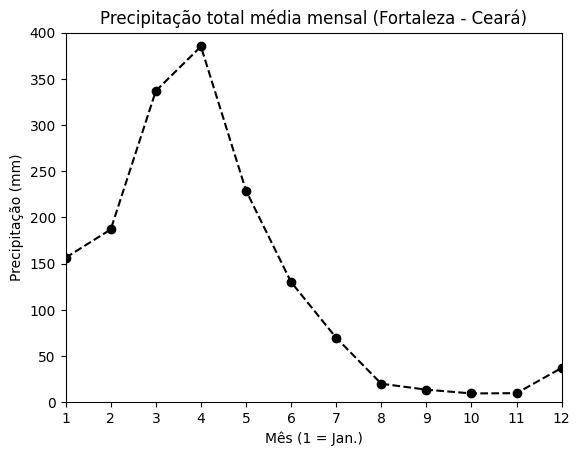

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mes = np.array(range(1, 13))
precipitacao = np.array([156.4, 187, 336.9, 385, 229, 130, 69.7, 20, 13.6, 9.5, 9.8, 37.1])

plt.plot(mes, precipitacao, "ko--")

plt.axis([1, 12, 0, 400])
plt.xticks(range(1, 13))

plt.xlabel("Mês (1 = Jan.)")
plt.ylabel("Precipitação (mm)")
plt.title("Precipitação total média mensal (Fortaleza - Ceará)");

No notebook anterior, fomos apresentados aos fundamentos das arrays: como criar, indexar e fatiar arrays e como fazer cálculos sobre os elementos do array.

Para analisar os dados de precipitação acima, é necessário ampliar esses conceitos de arrays, juntamente com a incorporação de duas novas estruturas de programação - **loops** e **condicionais** - para permitir que o código examine várias partes de dados de maneira contextualizada.

## <font color=#005757>1.1. Uma pequena parada: `range`</font>

Veja que no gráfico usamos `range`para definir um array para os meses. A função é `range` é uma função integrada do Python que gera uma sequência de números dentro de um intervalo especificado. Ele retorna um objeto de intervalo, não uma lista, o que é mais eficiente em termos de memória para intervalos grandes. É extremamente usado dentro de loopings, como iremos ver. Veja por exemplo:

In [3]:
range(1, 13)

range(1, 13)

In [4]:
list(range(1, 13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [5]:
np.array(range(1, 13))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [6]:
# Ele também aceita passos: valos de 1 a 20 (não incluso) de 2 em 2
list(range(1, 20, 2))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# <font color=#005757>2. Mais sobre criação de arrays</font>

Embora às vezes estejamos interessados em criar arrays a partir de uma lista de valores que digitamos, na maioria das vezes queremos que o computador crie e preencha nossos arrays para nós, com base em alguns requisitos. Se quisermos criar um array de um milhão de elementos, não queremos digitar todos esses valores à mão!

Para criar um array unidimensional com um número dado de elementos, todos preenchidos com zeros, podemos fazer:


In [7]:
# Por padrão cada elemento é um valor float
cinco_0s = np.zeros(5)
cinco_0s

array([0., 0., 0., 0., 0.])

In [8]:
# Mas podemos especificar o tipo com dtype
cinco_0s_inteiros = np.zeros(5, dtype = int)
cinco_0s_inteiros

array([0, 0, 0, 0, 0])

Ou se quisermos com uns em vez de zeros?

In [9]:
cinco_1s = np.ones(5)
cinco_1s

array([1., 1., 1., 1., 1.])

e se quisermos um valor específico em vez de zeros e uns?

In [10]:
cinco_100s = np.ones(5) * 100
cinco_100s

array([100., 100., 100., 100., 100.])

Um tipo comum de cálculo envolve uma coleção de valores em aumento constante (ou decrescente). Existe uma maneira rápida de criar um array unidimensional de valores em aumento constante? Sim: a função `arange`:

In [11]:
# cinco valores inteiros
np.arange(5)

array([0, 1, 2, 3, 4])

In [12]:
# cinco valores float
np.arange(5, dtype = float)

array([0., 1., 2., 3., 4.])

In [13]:
# cinco valores com passo específico
np.arange(0, 1.1, 0.25)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Observe que o `np.arange` é muito parecido com o `range` do início desse notebook. No entanto, essa função já retorna um array e permite especificar o passo como um número float.

Um dos que mais uso para algo assim é o `linspace`, ele retorna números uniformemente espaçados ao longo de um intervalo especificado:

In [14]:
# Pense assim: eu quero 10 números e estão uniformemente espaçados entre 1 e 100
np.linspace(1, 100, 10)

array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.])

Para mais, veja a [Documentação do NumPy](https://numpy.org/doc/stable/reference/routines.array-creation.html)

# <font color=#005757>3. Introdução a estrutura condicional </font>

A estrutura condicional é uma das ferramentas fundamentais que um programador possui para **controlar o fluxo de um programa** com base em determinadas condições. 

## <font color=#005757>3.1. Booleanos </font>

**Expressões booleanas** são o alicerce dessa lógica de decisão. Elas avaliam se uma determinada condição é verdadeira ou falsa. Em Python, assim como o tipo `int` representa números inteiros e o tipo `float` representa valores de ponto flutuante (decimais), o tipo `bool` representa valores booleanos. 

Um valor booleano em Python pode ter um de dois valores: `True` ou `False` (observe que a capitalização é importante). Esses valores *não são strings*: eles são valores em si.

In [48]:
True

True

In [49]:
False

False

Se queremos determinar se uma condição é verdadeira ou falsa, precisamos usar** operadores de comparação** para comparar objetos (como números). A Tabela abaixo lista os operadores básicos de comparação:

| Operador       | Código                 |
|----------------|------------------------|
| Igual a        | `==`                   |
| Diferente de   | `!=`                   |
| Maior que      | `>`                    |
| Maior ou igual a  | `>=`                |
| Menor ou igual a  | `<=`                |


O resultado de uma comparação é um objeto booleano (do tipo `bool`) que possui exatamente um dos dois valores: `True` ou `False`:

In [50]:
7 == 9

False

In [54]:
4 >= 3.14

True

## <font color=#005757>3.2. Declaração `if` </font>

O `if`é uma estrutura condicional que faz algum tipo de teste que pode ser avaliado como verdadeiro ou falso, por exemplo, se dois valores são iguais ou se um é maior que o outro. Por exemplo,

In [39]:
numero_atomico = 6

# Se esse valor for igual a 6 então...
# O símbolo == é o operador que testa se dois valores são iguais
if numero_atomico == 6:
  print("O elemento tem o mesmo número de prótons que o carbono")

O elemento tem o mesmo número de prótons que o carbono


In [40]:
# Se a variavel numero_atomico for menor que 6 então...
if numero_atomico < 6:
  print("O elemento tem menos prótons que o carbono")

In [41]:
# Vamos mudar nosso numero atômico:
numero_atomico = 3

if numero_atomico < 6:
    print("O elemento tem menos prótons que o carbono")
if numero_atomico > 6:
    print("O elemento tem mais prótons que o carbono")

O elemento tem menos prótons que o carbono


## <font color=#005757>3.3. Declaração `if-else` </font>

Como especificamos comandos Python para executar quando a condição `if` é falsa, mas apenas se a condição `if` for falsa? Este é o propósito da instrução `if-else`:

In [44]:
numero_atomico = 6

# Lembre-se que fizemos isso anteriormente e não aconteceu nada...
if numero_atomico < 6:
  print("O elemento tem menos prótons que o carbono")
else:
  print("O elemento pode ter o número de prótons igual ou maior que o carbono")

O elemento pode ter o número de prótons igual ou maior que o carbono


## <font color=#005757>3.4. Declaração `if-elif` </font>

Vimos anteriormente como podemos encadear várias instruções if para selecionar uma opção de um conjunto de opções possíveis. No entanto, em tal coleção de instruções, não fica totalmente claro que essas declarações estão todas relacionadas umas com as outras. Python possui outra construção para tornar essa inter-relação mais clara: a instrução `if-elif`:

In [46]:
numero_atomico = 2

if numero_atomico < 6:
  print("Elemento tem menos prótons que carbono")
elif numero_atomico > 6:
  print("Elemento tem mais prótons que carbono")
elif numero_atomico == 6:
  print("Elemento é carbono")
else:
  print("Número atômico impróprio")

Elemento tem menos prótons que carbono


## <font color=#005757>3.5. Aninhando senteças `if-else` </font>

Às vezes, uma simples estrutura `if-else` não é suficiente para lidar com todas as condições. É aqui que o aninhamento entra em cena. Podemos colocar uma estrutura `if-else` dentro de outra, permitindo-nos verificar condições mais complexas:

In [66]:
nota = 5

if nota >= 7:
    print("Aprovado")
else:
    if nota >= 4:
        print("Recuperação")
    else:
        print("Reprovado")

Recuperação


Veja o exemplo do ano bissexto resolvido lá embaixo!

# <font color=#005757>4. Introdução aos Loops</font>

Vimos até agora maneiras poderosas de extrair alguns ou todos os elementos em um array e fazer cálculos com eles. No entanto, há momentos em que precisamos de um controle mais refinado em nossos cálculos. Por exemplo, às vezes precisamos escolher certos elementos e fazer cálculos usando esses elementos.




## <font color=#005757>4.1 `for`</font>

<div>
<img src="https://imgur.com/wpmvV3I.png" width="500"/>
</div>

In [27]:
# Vamos usar os dados do início desse notebook:
precipitacao = np.array([156.4, 187, 336.9, 385, 229, 130, 69.7, 20, 13.6, 9.5, 9.8, 37.1])

# Veja como o for está funcionando:
for valor in precipitacao:
  print(f"Valor: {valor}")

Valor: 156.4
Valor: 187.0
Valor: 336.9
Valor: 385.0
Valor: 229.0
Valor: 130.0
Valor: 69.7
Valor: 20.0
Valor: 13.6
Valor: 9.5
Valor: 9.8
Valor: 37.1


A variável `valor` é chamado de **iterador** e no array `precipitacao` é chamado de **iterável**. Iteráveis são qualquer tipo de coleção de dados onde a ideia é "avançar para o próximo item". Veja:

In [28]:
# Outro exemplo
distancias = [0, 2, 2.5, 4.1, 3.6, 5.1]

# Inicializador
distancia_total = 0

for i in distancias:
  distancia_total += i
  print(distancia_total)

0
2
4.5
8.6
12.2
17.299999999999997


Strings também são iteráveis e podem ser percorridas em um loop, assim como a lista mostrada acima:

In [32]:
texto = "Introdução à Python na UFC"

for letra in texto:
  print(letra, end = ".")

I.n.t.r.o.d.u.ç.ã.o. .à. .P.y.t.h.o.n. .n.a. .U.F.C.

Um uso importante dos loops é calcular somas. Como exemplo simples, suponha alguma variável x dada pela expressão matemática:
$$ x = \sum_{i = 1}^N 2x_i $$
ou seja, somando os $N$ primeiros números pares. Para algum $N$ dado, digamos $N = 5$, $x$ seria então:

In [38]:
N = 5

# Inicializador, tal como vimos anteriormente 
x = 0

# Aqui usamos o range! list(range(1, N + 1)) = [1,2,3,4,5]
for i in range(1, N + 1):
    x = x + 2 * i

# Se esse print estivesse dentro do loop, ele mostraria o x em cada interação
print(x)

30


In [70]:
for x in range(1, 11):
    if x % 2 == 0:
        print(f"{x} é par!")
    else:
        print(f"{x} é impar!")

1 é impar!
2 é par!
3 é impar!
4 é par!
5 é impar!
6 é par!
7 é impar!
8 é par!
9 é impar!
10 é par!


Vejamos outro exemplo para nossos dados de precipitação. Imagine que queremos saber qual é o mês com maior precipitação e vamos usar o `for` e `if-else` para isso:

In [67]:
# Apenas repetindo os dados aqui para nos lembrarmos:
mes = np.array(range(1, 13))
precipitacao = np.array([156.4, 187, 336.9, 385, 229, 130, 69.7, 20, 13.6, 9.5, 9.8, 37.1])

# Definindo o primeiro elemento de cada variável como maior:
maior_precipitacao = precipitacao[0]
mes_maior_precipitacao = mes[0]

# Para cada elemento dentro do mês:
for i in range(1, len(mes)):
  # Se essa precipitacao for maior que o nosso fixado
  if precipitacao[i] > maior_precipitacao:
    # O fixado será essa esse maior
    maior_precipitacao = precipitacao[i]
    # E o mês também
    mes_maior_precipitacao = mes[i]

print(f"O mês com a maior precipitação é o mês {mes_maior_precipitacao}, com {maior_precipitacao} mm.")

O mês com a maior precipitação é o mês 4, com 385.0 mm.


Bom, você pode está se perguntando se existe alguma forma de fazer isso sem usar nem looping nem alguma estrutura condicional. Podemos usar o próprio NumPy para isso:

In [68]:
# Encontrando o índice do maior valor na matriz de precipitação
indice_maior_precipitacao = np.argmax(precipitacao)

# Obtendo o valor da maior precipitação
maior_precipitacao = precipitacao[indice_maior_precipitacao]

# Obtendo o mês correspondente ao índice encontrado
mes_maior_precipitacao = mes[indice_maior_precipitacao]

print(f"O mês com a maior precipitação é o mês {mes_maior_precipitacao}, com {maior_precipitacao} mm.")

O mês com a maior precipitação é o mês 4, com 385.0 mm.


## <font color=#005757>4.2. `while` </font>

Existem situações onde precisamos repetir um conjunto de instruções várias vezes até que uma condição seja atendida. Para isso, podemos usar um tipo de loop chamado `while`.

In [80]:
i = 0

while i < 10:
    i += 1

print(i)

10


**ATENÇÃO** É importante ter cuidado ao usar o loop `while`, pois se a condição nunca se tornar falsa, o loop continuará para sempre, resultando em um "loop infinito". Sempre verifique se sua condição eventualmente se tornará falsa:


```python
# Não tente isso!
i = 0
while i < 10:
    print(i)
```

Python oferece três outras instruções para controlar o fluxo de um programa. O comando `break`, utilizado dentro de um loop, encerra imediatamente esse loop e move a execução para as instruções seguintes ao loop:

In [99]:
x = 0

while True:
    x += 1 
    if x % 15 == 0:
        if x % 25 == 0:
            print(f"{x} é divisível por 15 e por 25")
            break

75 é divisível por 15 e por 25


A instrução `continue` age de forma semelhante ao `break`, mas em vez de sair do loop contendo, ela imediatamente força a próxima iteração do loop sem completar o bloco de instruções para a iteração atual. Por exemplo,

In [100]:
x = 0

while x < 10:
    x += 1
    if x % 2 != 0:
        continue
    print(x, 'é par!')

2 é par!
4 é par!
6 é par!
8 é par!
10 é par!


In [102]:
# isso é o mesmo que fazer:
for i in range(1, 11):
    if i % 2:
        continue
    print(i, 'é par!')

2 é par!
4 é par!
6 é par!
8 é par!
10 é par!


Embora tanto o `while` quanto o `for` sejam utilizados para repetir um bloco de código, eles diferem na forma como controlam a execução dessas repetições.

**Loop `while`:**
- O loop `while` é utilizado quando não sabemos previamente quantas vezes o bloco de código precisará ser repetido. Ele continua repetindo o bloco de código enquanto a condição especificada for verdadeira.
- O loop `while` é mais adequado quando não temos uma contagem explícita de iterações ou quando a condição de parada é baseada em alguma mudança ou evento dentro do bloco de código.

**Loop `for`:**
- O loop `for` é utilizado quando sabemos previamente a quantidade de vezes que o bloco de código deve ser repetido. Ele itera sobre uma sequência de elementos, como uma lista, tupla, string, ou até mesmo um intervalo de números.
- O loop `for` é mais adequado quando temos uma contagem explícita de iterações ou quando precisamos percorrer os elementos de uma sequência.

In [84]:
# USANDO WHILE
contador = 0
while contador < 5:
    print("Número:", contador)
    contador += 1

Número: 0
Número: 1
Número: 2
Número: 3
Número: 4


In [85]:
# USANDO FOR
for numero in range(5):
    print("Número:", numero)

Número: 0
Número: 1
Número: 2
Número: 3
Número: 4


# <font color=#005757>6. Exercícios </font>


## <font color=#005757>6.1 Ano bissexto (Exercício resolvido)</font>

No calendário gregoriano, determinamos se um ano é bissexto seguindo certas regras: um ano é bissexto se for divisível por 4, com a exceção de que anos divisíveis por 100 não são anos bissextos, a menos que também sejam divisíveis por 400. Use `if-else` aninhados para determinar se 2028 é um ano bissexto.

In [64]:
ano = 2028

if ano % 4 == 0:
    if ano % 100 == 0:
        if ano % 400 == 0:
            print(f"O ano {ano} É bissexto")
        else:
            print(f"O ano {ano} NÃO É bissexto")
    else:
        print(f"O ano {ano} É bissexto")
else:
    print(f"O ano {ano} NÃO É bissexto")

O ano 2028 É bissexto


## <font color=#005757>6.2 Um Sistema Massa-Mola</font>

Considere o seguinte sistema massa-mola com uma constante de mola $k$ e uma massa $m$:

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Horizontal-mass-on-spring.svg/640px-Horizontal-mass-on-spring.svg.png" width="330"/>
</div>

Assumindo a ausência de gravidade e que a massa só pode se mover na direção positiva ou negativa de $x$, a solução para o deslocamento $x$ é:

$$ x = A \cos(\omega t + \phi)$$

onde $A$ é a amplitude da oscilação, $t$ é o tempo, $\phi$ é o ângulo de fase, e a frequência angular $\omega$ é dada por:

$$\omega = \sqrt{\frac{k}{m}}$$

Se $A = 0.05 \, \text{m}$, $k = 2 \, \text{N/m}$, $m = 1 \, \text{kg}$, e $\phi = 0 \, \text{rad}$ (o que significa que $x = A$ em $t = 0 \, \text{s}$), crie um array e preencha-o com os valores de $x$ para os primeiros 8 s, tirados a cada 0.1 s. Plote este array de valores de deslocamento $x$ versus os elementos correspondentes no array de valores de tempo $t$.

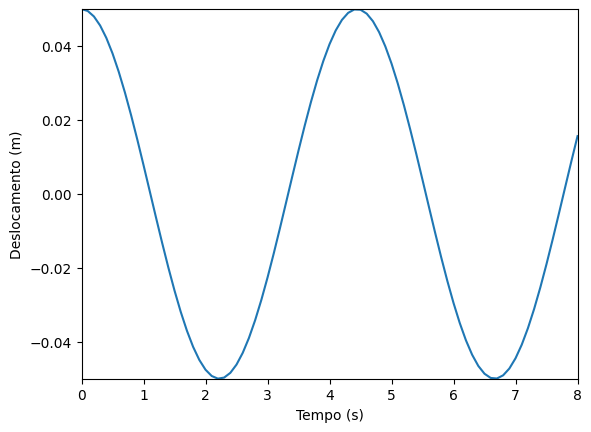

In [ ]:
# Extra: você conseguiria fazer isso dentro de uma função?

## <font color=#005757>6.3 Calculando médias da precipitação</font>

Imprima os meses em que os valores mensais totais de precipitação estão acima da média do período. Dica: A média do período é a média dos valores médios mensais totais de precipitação para o período em questão (1991 a 2020). Use loops for para fazer os cálculos.

Valor de precipitação 156.4 está acima da média do período no mês 1
Valor de precipitação 187.0 está acima da média do período no mês 2
Valor de precipitação 336.9 está acima da média do período no mês 3
Valor de precipitação 385.0 está acima da média do período no mês 4
Valor de precipitação 229.0 está acima da média do período no mês 5

 Média do período (1991 a 2020) 131.99999999999997


## <font color=#005757>6.4 Concentração de íon hidrogênio</font>

Um método iterativo para calcular a concentração de íons hidrogênio, $[\text{H+}]$, em uma solução ácida, com base na constante de dissociação ácida, $K_a$, e na concentração do ácido, $c$, é usando fórmula seguinte repetidamente:
$$[\text{H+}]_{n+1} = \sqrt{K_a (c - [H+]_n)}$$
O processo começa com $[\text{H+}]_0 = 0$, e as iterações continuam até que a mudança em $[\text{H+}]$ seja menor que uma tolerância pré-definida e pequena.

Utilize este método para determinar a concentração de íon hidrogênio e, consequentemente, o pH $(= -\log_{10} [\text{H+}])$ de uma solução de ácido acético com $c = 0,01$ ($K_a = 1,78 \times 10^{-5}$). A tolerância será $\text{TOL} = 1 \times 10^{-10}$.

Concentração de íon hidrogênio (H+): 0.00041290455528237576
pH da solução: 3.3841503258366408
